In [57]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

In [58]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from sklearn import cluster

In [59]:
df = pd.read_csv("Iris.csv", index_col = 'Species')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,5.1,3.5,1.4,0.2
Iris-setosa,2,4.9,3.0,1.4,0.2
Iris-setosa,3,4.7,3.2,1.3,0.2
Iris-setosa,4,4.6,3.1,1.5,0.2
Iris-setosa,5,5.0,3.6,1.4,0.2


In [60]:
import warnings
from sklearn.cluster import KMeans
# Filter the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)\
# Create the KMeans object
model = KMeans(n_clusters=3)
df_data_centered = df - np.mean(df,axis = 0)
df_data_centered_scaled = df_data_centered / np.std(df_data_centered, axis = 0)

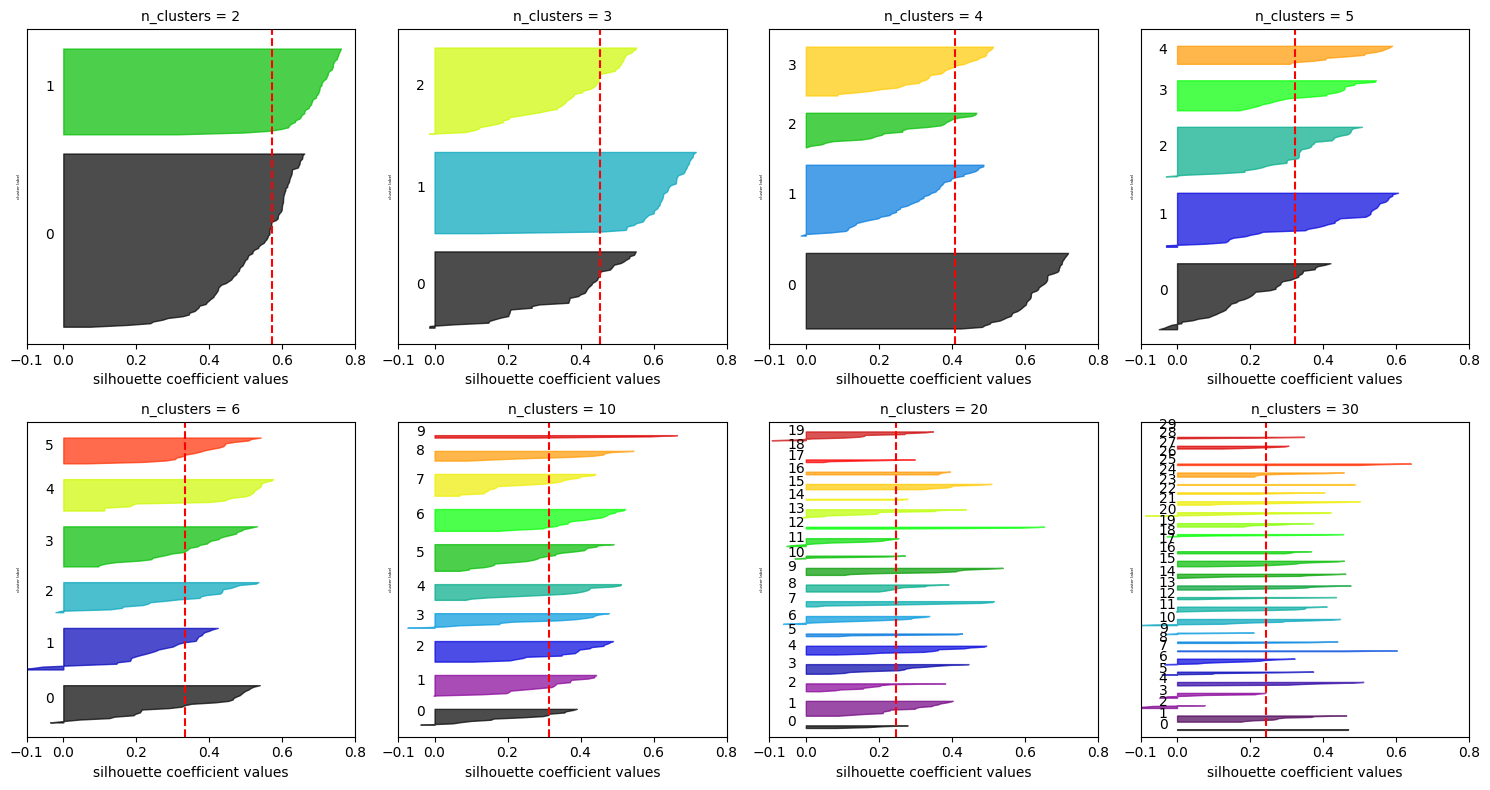

In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import warnings
from sklearn.cluster import KMeans
# Filter the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Create the KMeans object
model = KMeans(n_clusters=3)

X = df_data_centered_scaled.to_numpy()
range_n_clusters = [2, 3, 4, 5, 6, 10, 20, 30]
inertia = []

plt.figure(figsize=(15, 8))
for n_clusters in range_n_clusters:
    ax1 = plt.subplot(2, 4, range_n_clusters.index(n_clusters)+1)
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_xlim([-0.1, 0.8])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 42 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    inertia += [clusterer.inertia_]

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("n_clusters = %d"% n_clusters, fontsize=10)
    ax1.set_xlabel("silhouette coefficient values", fontsize=10)
    ax1.set_ylabel("cluster label", fontsize=3)

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8])


plt.tight_layout()
plt.show()

In [62]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


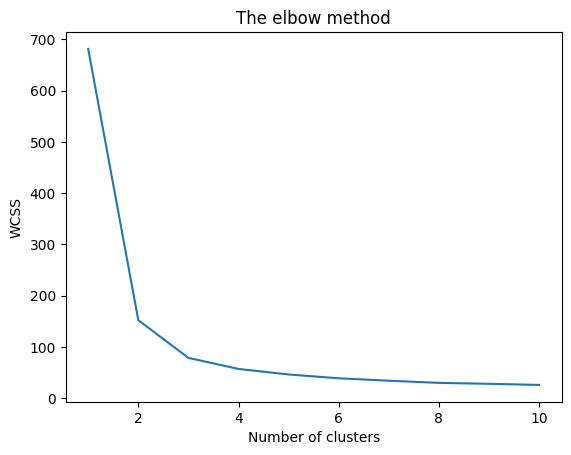

In [63]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [64]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

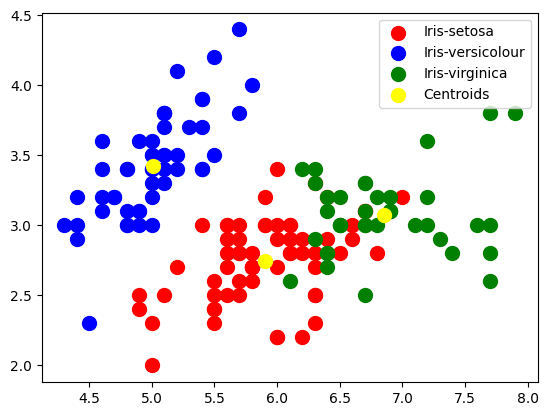

In [50]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()